<a href="https://colab.research.google.com/github/dariarozhnova/my_projects/blob/main/CodeForVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the CW_folder_PG
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision/CW_folder_PG'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CompVis/CW_Folder_PG/Video'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['CodeForVideo.ipynb', 'My Movie 1.mp4', 'Extracted images']


In [ ]:
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte
import cv2
from skimage.feature import hog
from matplotlib import patches
import random

In [ ]:
def load_images_from_folder(folder):
    images = []
    filenames = []

    for filename in sorted(os.listdir(folder))[0::10]:
      img = io.imread(os.path.join(folder,filename))
      if img is not None:
        images.append(img)
        filenames.append(filename)
    return images, filenames

In [ ]:
# Adapted from https://www.codegrepper.com/code-examples/python/python+extract+frame+from+video
import cv2
path = os.path.join(GOOGLE_DRIVE_PATH, 'Extracted images')
vidcap = cv2.VideoCapture(os.path.join(GOOGLE_DRIVE_PATH, 'My Movie 1.mp4'))
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(os.path.join(path ,"frame%d.jpg" % count), image)     # save frame as JPEG file      
  success,image = vidcap.read()
  count += 1


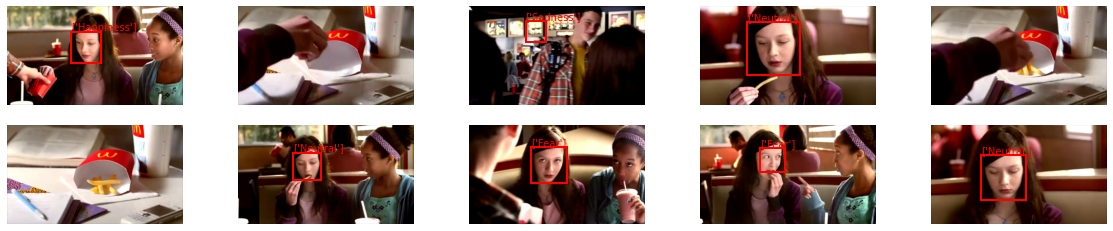

In [ ]:
GOOGLE_DRIVE_PATH_MODELS = ('drive/My Drive/Colab Notebooks/CompVis/CW_Folder_PG')
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH_MODELS, 'Models')

model_filename = os.path.join(CODE_PATH, 'MLP_HOG.py')
model_HOG= joblib.load(model_filename)
model = model_HOG[0]

path = os.path.join(GOOGLE_DRIVE_PATH, 'Extracted images')
frames = load_images_from_folder(path)
images = frames[0]
images_10 = random.sample(images, 10)
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (20,4), sharex=True, sharey=True)
ax = axes.ravel()
for i in range(10):
  img_gray = color.rgb2gray(images_10[i])
  img_gray = img_as_ubyte(img_gray)

  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(img_gray, 1.3, 6)

  for (x,y,w,h) in faces:
    roi_gray=img_gray[y:y+w,x:x+h] #face area from  image  
    roi_gray=cv2.resize(roi_gray,(100,100))  
    img = roi_gray.reshape((100,100))
    img = img /255.0
    hog_f = hog(img, orientations=8, pixels_per_cell=(8,8),cells_per_block=(2, 2),block_norm= 'L2')
    hog_f = hog_f.reshape(1, -1)
    y_pred = model.predict(hog_f)

    dic = {1:'Surprise', 2:'Fear', 3:'Disgust', 4:'Happiness', 5:'Sadness', 6:'Sadness', 7:'Neutral'}
    emotions_pred=[dic.get(n, n) for n in y_pred]

    ax[i].add_patch(
        patches.Rectangle(xy=(x, y), width=w, height=h,
                            fill=False, color='r', linewidth=2))

    ax[i].text(x, y, emotions_pred,
            horizontalalignment='left',
            verticalalignment='bottom',
            color='r', fontsize=10)
  ax[i].imshow(images_10[i])
  ax[i].set_axis_off()

fig.tight_layout
plt.show()